# Merchandise Popularity Prediction Challenge

Solution by: Pratik Nabriya | [LinkedIn ](https://www.linkedin.com/in/pratiknabriya)| [GitHub](https://www.github.com/pratiknabriya)

### Importing Libraries and loading data

In [ ]:
# import libraries 

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount drive
from google.colab import drive 

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# loading data in Pandas dataframe from csv files

my_path = '/content/gdrive/My Drive/MachineHack/Merchandise_popularity_prediction/'

train_data = pd.read_csv(my_path + 'Train.csv')
test_data = pd.read_csv(my_path + 'Test.csv')

In [ ]:
train_data.head(10)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.94400,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.90000,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.00000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.93100,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.00000,0.1090,0.0677,109.560,186507,3
5,0.756,0.60900,3,-7.927,1,0.2170,0.00474,0.0960,0.5370,117.023,155720,4
6,0.398,0.03360,10,-30.369,1,0.9960,0.96200,0.1300,0.6120,72.166,134500,4
7,0.717,0.69900,5,-5.665,0,0.2230,0.00000,0.1390,0.6890,100.147,186600,4
8,0.419,0.57400,4,-12.221,0,0.1020,0.46200,0.8950,0.3450,129.260,685880,4
9,0.705,0.22100,3,-11.474,0,0.9380,0.90600,0.1110,0.3840,84.962,143131,4


In [ ]:
train_data.shape

(18208, 12)

In [ ]:
test_data

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.991000,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.322000,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.009310,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.221000,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.007650,0.0521,0.96300,131.715,288293
...,...,...,...,...,...,...,...,...,...,...,...
12135,0.171,0.118,2,-25.360,1,0.86100,0.871000,0.0932,0.05390,78.303,192039
12136,0.744,0.859,11,-3.166,1,0.02560,0.000063,0.0881,0.78700,91.977,232787
12137,0.572,0.852,6,-4.712,0,0.00105,0.000000,0.0844,0.37800,129.969,216411
12138,0.761,0.525,11,-6.900,1,0.44000,0.000007,0.0921,0.53100,80.870,238805


In [ ]:
test_data.shape

(12140, 11)

### Exploratory Data Analysis 

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


All values are either Integer or float

In [ ]:
train_data.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

No null values in train set. Check in the test set now 

In [ ]:
test_data.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

In [ ]:
# class label proportion

train_data['popularity'].value_counts()

4    15231
3     2166
5      472
1      323
0       16
Name: popularity, dtype: int64

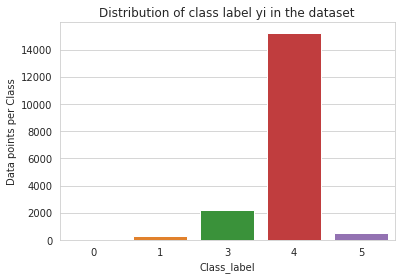

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Number of data points in class 0 = 16 ~ 0.088%
Number of data points in class 1 = 323 ~ 1.774%
Number of data points in class 3 = 2166 ~ 11.896%
Number of data points in class 4 = 15231 ~ 83.65%
Number of data points in class 5 = 472 ~ 2.592%
--------------------------------------------------
total datapoints: 18208


In [ ]:
label_dict = dict(train_data['popularity'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize = (6, 4))
sns.barplot(x = list(label_dict.keys()), y = list(label_dict.values()))
plt.xlabel('Class_label')
plt.ylabel('Data points per Class')
plt.title('Distribution of class label yi in the dataset')
plt.show()

# Percentage-wise distribution of the class label yi's
print("- "* 50)
for i in sorted(label_dict.keys()):
  print("Number of data points in class {0} = {1} ~ {2}%".format(
  i, label_dict[i], round((label_dict[i]*100)/sum(label_dict.values()), 3)))

print("-"*50)
print("total datapoints:", sum(label_dict.values()))

As we can see the class label 4 is highly dominating

In [ ]:
# Check for duplicate values in the train set

train_data[train_data.duplicated()]

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
455,0.641,0.32400,11,-5.851,1,0.69800,0.000000,0.3280,0.2730,110.184,185487,4
591,0.112,0.02640,7,-28.927,1,0.82100,0.806000,0.1130,0.0596,68.141,277555,4
598,0.687,0.57700,10,-7.801,0,0.11800,0.841000,0.1080,0.6060,91.988,122609,4
629,0.320,0.00892,8,-29.206,1,0.99600,0.919000,0.1100,0.3380,91.366,165904,4
661,0.704,0.88400,8,-6.275,1,0.54900,0.000364,0.0492,0.9640,93.058,228554,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18195,0.730,0.70500,5,-4.358,0,0.28600,0.000000,0.1130,0.6550,139.924,175000,4
18196,0.147,0.38100,1,-28.083,1,0.00136,0.951000,0.0947,0.1430,97.966,210450,4
18197,0.532,0.02020,4,-22.763,1,0.99300,0.935000,0.1060,0.2850,85.445,168611,4
18204,0.481,0.01140,4,-26.196,1,0.99100,0.967000,0.0985,0.3430,57.748,155500,4


In [ ]:
# remove all the duplicate rows

train_data.drop_duplicates(keep = 'first', inplace = True)
train_data.shape

(15285, 12)

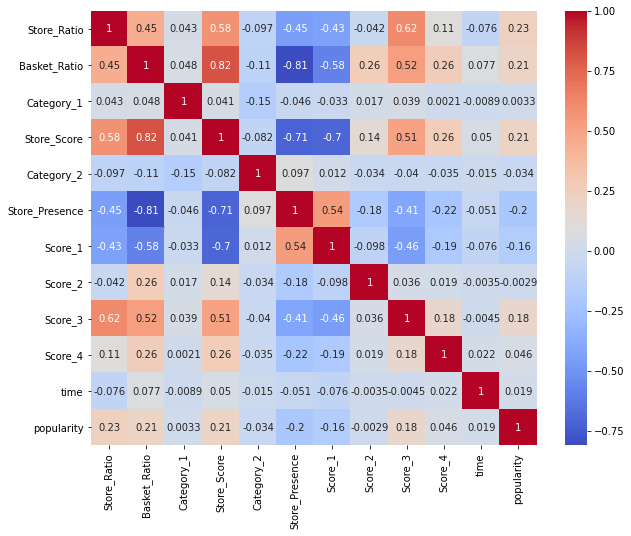

In [ ]:
# correlation between the features using heatmap

#train_feats = train_data[[i for i in train_data.columns if i!= 'popularity']]

plt.figure(figsize = (10, 8))
sns.heatmap(train_data.corr(), cmap = 'coolwarm', annot = True)
plt.show()

Now lets see how each feature impacts the popularity score

In [ ]:
train_data['Category_1'].value_counts()

0     1921
7     1713
2     1627
9     1418
1     1387
5     1359
4     1141
11    1096
8     1008
6      989
10     978
3      648
Name: Category_1, dtype: int64

In [ ]:
train_data['Category_2'].value_counts()

1    9877
0    5408
Name: Category_2, dtype: int64

In [ ]:
for i in sorted(train_data['Category_1'].value_counts().keys()):
    print("Category_1:", i)
    print(train_data[train_data['Category_1'] == i]['Category_2'].value_counts())
    print("- "*30)

Category_1: 0
1    1469
0     452
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 1
1    958
0    429
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 2
1    1233
0     394
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 3
1    455
0    193
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 4
1    593
0    548
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 5
1    819
0    540
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 6
1    543
0    446
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 7
1    1280
0     433
Name: Category_2, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Ca

In [ ]:
for i in sorted(train_data['Category_1'].value_counts().keys()):
    print("Category_1:", i)
    print(train_data[train_data['Category_1'] == i]['popularity'].value_counts())
    print("- "*30)

Category_1: 0
4    1588
3     250
5      53
1      25
0       5
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 1
4    1201
3     123
5      37
1      25
0       1
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 2
4    1345
3     209
5      46
1      27
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 3
4    515
3    103
5     16
1     13
0      1
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 4
4    945
3    149
5     29
1     17
0      1
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 5
4    1148
3     161
5      26
1      20
0       4
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_1: 6
4    840
3    103
5     25
1     21
Name: popularity, dtype: int64
- -

In [ ]:
for i in sorted(train_data['Category_2'].value_counts().keys()):
    print("Category_2:", i)
    print(train_data[train_data['Category_2'] == i]['popularity'].value_counts())
    print("- "*30)

Category_2: 0
4    4641
3     546
5     138
1      79
0       4
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Category_2: 1
4    8209
3    1238
5     238
1     182
0      10
Name: popularity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [ ]:
train_data['Category_2'].value_counts()

1    9877
0    5408
Name: Category_2, dtype: int64

Conclusion: 

1. Any particular Category ( Category_1 or Category_2) has no influence on the popularity. 

In [ ]:
train_data.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


#### Store Presence and Popularity

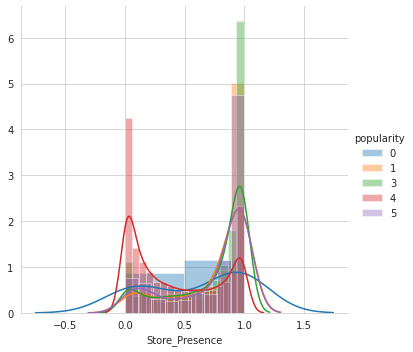

In [ ]:
sns.FacetGrid(train_data, hue = "popularity", height = 5).map(sns.distplot, "Store_Presence").add_legend()
plt.show()

#### Store ratio and Popularity

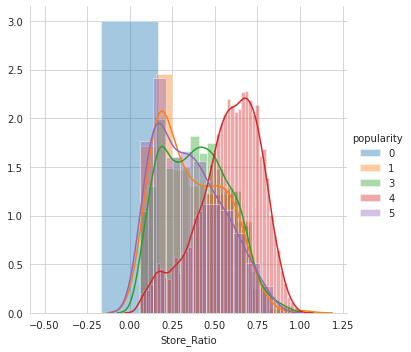

In [ ]:
sns.FacetGrid(train_data, hue = "popularity", height = 5).map(sns.distplot, "Store_Ratio").add_legend()
plt.show()

This feaure can seperate 4 and other labels well

#### Basket ratio and Popularity

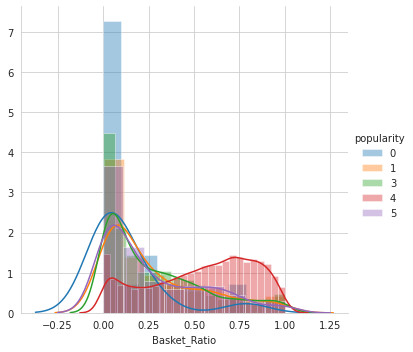

In [ ]:
sns.FacetGrid(train_data, hue = "popularity", height = 5).map(sns.distplot, "Basket_Ratio").add_legend()
plt.show()

This feature can seperate 4 and other labels well

#### Store Score and Popularity

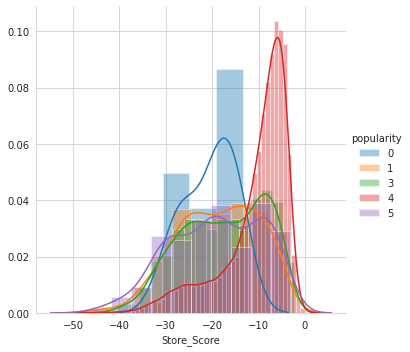

In [ ]:
sns.FacetGrid(train_data, hue = "popularity", height = 5).map(sns.distplot, "Store_Score").add_legend()
plt.show()

This feature can distinguish well between 0 and 4 labels 

#### Popularity and TIme

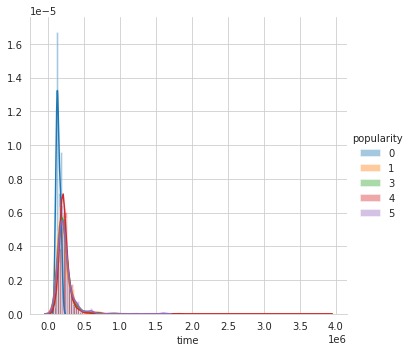

In [ ]:
sns.FacetGrid(train_data, hue = "popularity", height = 5).map(sns.distplot, "time").add_legend()
plt.show()

## Modelling 

### Data preprocessing 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# One hot encoding categorical variables

encoder = OneHotEncoder()
encoder.fit(train_data['Category_1'].values.reshape(-1, 1))
X_train_cat_1 = encoder.transform(train_data['Category_1'].values.reshape(-1, 1))
X_test_cat_1 = encoder.transform(test_data['Category_1'].values.reshape(-1, 1))

print(X_train_cat_1.shape)
print(X_test_cat_1.shape)

(15285, 12)
(12140, 12)


In [ ]:
train_data.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

In [ ]:
# scaling numerical columns

numerical_cols = ['Store_Ratio', 'Basket_Ratio', 'Store_Score', 'Store_Presence', 
                  'Score_1', 'Score_2', 'Score_3','Score_4', 'time']

X_train_num = train_data[numerical_cols]
X_test_num = test_data[numerical_cols]

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_std = scaler.transform(X_train_num)
X_test_num_std = scaler.transform(X_test_num)

print(X_train_num_std.shape)
print(X_test_num_std.shape)

(15285, 9)
(12140, 9)


In [ ]:
# Category_2

X_train_cat_2 = train_data['Category_2'].values.reshape(-1, 1)
X_test_cat_2 = test_data['Category_2'].values.reshape(-1, 1)

print(X_train_cat_2.shape)
print(X_test_cat_2.shape)

(15285, 1)
(12140, 1)


In [ ]:
# now consolidate all columns
from scipy.sparse import hstack

X_train = hstack((X_train_cat_1, X_train_cat_2, X_train_num_std))
X_test = hstack((X_test_cat_1, X_test_cat_2, X_test_num_std))

y_train = train_data['popularity'].values

print(X_train.shape, y_train.shape)
print(X_test.shape)

(15285, 22) (15285,)
(12140, 22)


### Linear Regression
(With hyperparameter tuning)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=21) # default penalty is L2 
parameter = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(lr, parameter, cv = 5, scoring = 'neg_log_loss', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=21, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_log_loss', verbose=0)

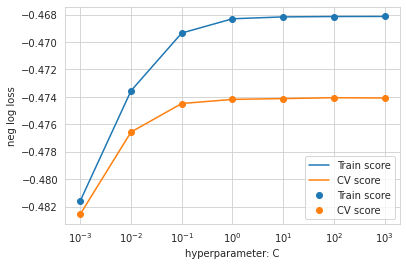

In [ ]:
# Plotting neg_log_loss for train data and validation data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['C'], train_loss, label = 'Train score')
plt.plot(parameter['C'], cv_loss, label = 'CV score')

plt.scatter(parameter['C'], train_loss, label = 'Train score')
plt.scatter(parameter['C'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: C")
plt.ylabel("neg log loss")
plt.show()

In [ ]:
cv_loss

array([-0.48254843, -0.47656431, -0.47448362, -0.47418347, -0.47412467,
       -0.47406064, -0.47408352])

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 100}
-0.4740606421758806


In [ ]:
from sklearn.metrics import log_loss

lr = LogisticRegression(C = 100, random_state = 21) # default penalty is L2 
lr.fit(X_train, y_train)
y_pred_test = lr.predict_proba(X_test)
y_pred_train = lr.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = lr.classes_, eps = 1e-15)
print(train_loss)

0.4687315096384044


In [ ]:
lr.classes_

array([0, 1, 3, 4, 5])

In [ ]:
y_pred_test

array([[1.96868048e-10, 5.16441995e-02, 1.07103507e-01, 7.52157039e-01,
        8.90952544e-02],
       [1.50405308e-11, 4.19927352e-03, 5.24841030e-02, 9.35302349e-01,
        8.01427481e-03],
       [3.12034393e-12, 5.41919723e-03, 9.23932204e-02, 8.87483835e-01,
        1.47037471e-02],
       ...,
       [7.77100781e-10, 5.38631647e-03, 3.60427915e-02, 9.48444003e-01,
        1.01268883e-02],
       [1.50830957e-07, 3.75356947e-03, 2.63134567e-02, 9.65700981e-01,
        4.23184235e-03],
       [2.90085634e-08, 3.65968208e-02, 2.51819161e-01, 6.79012196e-01,
        3.25717934e-02]])

In [ ]:
lr_tuned_df = pd.DataFrame(y_pred_test)
lr_tuned_df.head()

,0,1,2,3,4
0,1.968680e-10,0.051644,0.107104,0.752157,0.089095
1,1.504053e-11,0.004199,0.052484,0.935302,0.008014
2,3.120344e-12,0.005419,0.092393,0.887484,0.014704
3,8.609006e-08,0.005124,0.045173,0.940945,0.008758
4,6.686101e-11,0.000864,0.016149,0.979392,0.003595


In [ ]:
lr_tuned_df.to_csv(my_path + 'LR_C100.csv', index = False)

### Using Calibration with Linear regression

In [ ]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

lr = LogisticRegression(C = 100, random_state = 21) # default penalty is L2 
lr.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(lr, method = 'sigmoid')
sig_clf.fit(X_train, y_train)
y_pred_test = sig_clf.predict_proba(X_test)
y_pred_train = sig_clf.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = lr.classes_, eps = 1e-15)
print(train_loss)

0.5393684917632731


In [ ]:
lr.classes_

array([0, 1, 3, 4, 5])

In [ ]:
y_pred_test

array([[1.41886787e-05, 2.01358904e-02, 1.16922445e-01, 8.32648228e-01,
        3.02792480e-02],
       [1.01000947e-05, 1.63047021e-02, 1.23265150e-01, 8.36130269e-01,
        2.42897781e-02],
       [4.34063750e-06, 1.65414907e-02, 1.35691277e-01, 8.21068742e-01,
        2.66941500e-02],
       ...,
       [5.96618704e-05, 1.59970013e-02, 1.02811383e-01, 8.57644059e-01,
        2.34878947e-02],
       [6.67427238e-04, 1.50499519e-02, 8.82007406e-02, 8.76154420e-01,
        1.99274601e-02],
       [1.60035964e-04, 1.86296113e-02, 1.22003994e-01, 8.34233782e-01,
        2.49725762e-02]])

In [ ]:
lr_calib_df = pd.DataFrame(y_pred_test)
lr_calib_df.head()

,0,1,2,3,4
0,0.000014,0.020136,0.116922,0.832648,0.030279
1,0.000010,0.016305,0.123265,0.836130,0.024290
2,0.000004,0.016541,0.135691,0.821069,0.026694
3,0.000431,0.015234,0.094914,0.867748,0.021672
4,0.000031,0.013833,0.106243,0.856728,0.023167


In [ ]:
lr_calib_df.to_csv(my_path + 'LR_C100_calib.csv', index = False)

### Linear SVM

In [ ]:
from sklearn.linear_model import SGDClassifier

lr_svc = SGDClassifier(random_state = 21, alpha = 0.01) # default penalty is L2 # loss is hinge loss
sig_clf = CalibratedClassifierCV(lr_svc, method = 'sigmoid')
sig_clf.fit(X_train, y_train)

y_pred_test = sig_clf.predict_proba(X_test)
y_pred_train = sig_clf.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = lr.classes_, eps = 1e-15)
print(train_loss)

0.5039073956912167


In [ ]:
y_pred_test

array([[1.14466684e-03, 4.44673537e-02, 1.01800388e-01, 8.14010890e-01,
        3.85767020e-02],
       [9.85532186e-04, 1.48847431e-02, 6.04333518e-02, 9.09553250e-01,
        1.41431228e-02],
       [8.85686228e-04, 1.65944981e-02, 9.51307354e-02, 8.71789091e-01,
        1.55999894e-02],
       ...,
       [1.00066966e-03, 1.45808828e-02, 7.00415532e-02, 8.95469630e-01,
        1.89072641e-02],
       [9.79975798e-04, 1.25849050e-02, 7.42173704e-02, 8.95673712e-01,
        1.65440371e-02],
       [8.12168593e-04, 1.86571241e-02, 1.38550869e-01, 8.01389302e-01,
        4.05905359e-02]])

In [ ]:
lrsvm_tuned_df = pd.DataFrame(y_pred_test)
lrsvm_tuned_df.head()

,0,1,2,3,4
0,0.001145,0.044467,0.101800,0.814011,0.038577
1,0.000986,0.014885,0.060433,0.909553,0.014143
2,0.000886,0.016594,0.095131,0.871789,0.015600
3,0.000962,0.015819,0.058159,0.906368,0.018692
4,0.000898,0.014444,0.059517,0.904727,0.020414


In [ ]:
lrsvm_tuned_df.to_csv(my_path + 'SVM_alpha001.csv', index = False)

## Non Linear models 

### Random Forest (baseline)

In [ ]:
X_train = train_data[[i for i in train_data.columns if i != 'popularity']]
X_train.head(2)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.407,0.0038,2,-35.865,1,0.992,0.944,0.0988,0.1100,113.911,189125
1,0.234,0.1050,0,-19.884,1,0.944,0.900,0.1290,0.0382,76.332,186513


In [ ]:
X_test = test_data[[i for i in test_data.columns]]
X_test.head(2)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.991,0.789,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.322,0.107,0.35500,136.337,253631


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 21)
rf.fit(X_train, y_train)
y_pred_test = rf.predict_proba(X_test)
y_pred_train = rf.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = rf.classes_)
print(train_loss)

0.10197212601869865


In [ ]:
y_pred_test

array([[0.  , 0.01, 0.79, 0.17, 0.03],
       [0.  , 0.01, 0.01, 0.98, 0.  ],
       [0.  , 0.  , 0.06, 0.94, 0.  ],
       ...,
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.07, 0.23, 0.65, 0.05]])

In [ ]:
rf_baseline_df = pd.DataFrame(y_pred_test)
rf_baseline_df.head()

,0,1,2,3,4
0,0.0,0.01,0.79,0.17,0.03
1,0.0,0.01,0.01,0.98,0.00
2,0.0,0.00,0.06,0.94,0.00
3,0.0,0.01,0.04,0.94,0.01
4,0.0,0.00,0.00,1.00,0.00


In [ ]:
rf_baseline_df.to_csv(my_path + 'rf_baseline.csv', index = False)

In [ ]:
sample_data  = pd.read_csv(my_path + 'sample_submission.csv')
sample_data.head()

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


### XGBoost Classifier (baseline)

In [ ]:
# baseline xgboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

xgb = XGBClassifier(random_state = 21)
xgb.fit(X_train, y_train)

y_pred_test = xgb.predict_proba(X_test)
y_pred_train = xgb.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = xgb.classes_)
print(train_loss)

0.4262674248466889


In [ ]:
y_pred_test

array([[1.14233827e-03, 7.86580890e-02, 3.23301286e-01, 4.91993487e-01,
        1.04904816e-01],
       [4.20905970e-04, 5.73051814e-03, 3.44541483e-02, 9.52589810e-01,
        6.80454820e-03],
       [5.72068209e-04, 1.21123586e-02, 7.81889185e-02, 8.89522314e-01,
        1.96043402e-02],
       ...,
       [3.58884397e-04, 2.12665042e-03, 2.54502632e-02, 9.68948305e-01,
        3.11586168e-03],
       [3.10995209e-04, 4.26525902e-03, 1.71390381e-02, 9.73667383e-01,
        4.61732829e-03],
       [9.26051231e-04, 3.86219509e-02, 3.35304528e-01, 5.71541190e-01,
        5.36062382e-02]], dtype=float32)

In [ ]:
xgb_baseline_df = pd.DataFrame(y_pred_test)
xgb_baseline_df.head()

,0,1,2,3,4
0,0.001142,0.078658,0.323301,0.491993,0.104905
1,0.000421,0.005731,0.034454,0.952590,0.006805
2,0.000572,0.012112,0.078189,0.889522,0.019604
3,0.000471,0.008924,0.040753,0.937626,0.012226
4,0.000195,0.001196,0.007472,0.987239,0.003898


In [ ]:
xgb_baseline_df.to_csv(my_path + 'xgb_baseline.csv', index = False)

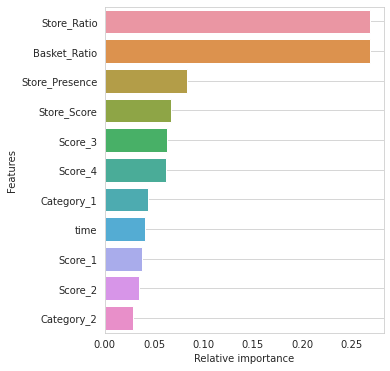

In [ ]:
feat_df = pd.DataFrame({'Features': X_train.columns, 'Relative importance': xgb.feature_importances_})
imp_feat_df = feat_df.sort_values('Relative importance', ascending = False)
plt.figure(figsize = (5, 6))
sns.barplot(x = 'Relative importance', y = 'Features', data = imp_feat_df)
plt.grid()
plt.show()

### XGB Classifier 
(with hyperparameter tuning) 

In [ ]:
# baseline xgboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

xgb = XGBClassifier(n_estimators = 450, max_depth = 5, colsample_bytree = 0.8, 
                    subsample = 0.6, random_state = 21)
xgb.fit(X_train, y_train)

y_pred_test = xgb.predict_proba(X_test)
y_pred_train = xgb.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = xgb.classes_)
print(train_loss)

0.15614227967789163


In [ ]:
y_pred_test

array([[1.5379074e-04, 1.0314447e-02, 7.9544222e-01, 1.6657025e-01,
        2.7519336e-02],
       [1.8478439e-05, 4.5359047e-04, 1.4495723e-02, 9.8425126e-01,
        7.8099803e-04],
       [3.1922904e-05, 1.6217332e-03, 2.9189277e-02, 9.6097124e-01,
        8.1858514e-03],
       ...,
       [8.4173926e-06, 8.4626321e-05, 3.6163938e-03, 9.9606508e-01,
        2.2551767e-04],
       [2.7049278e-05, 9.6558954e-04, 1.1875007e-02, 9.8563194e-01,
        1.5003750e-03],
       [3.8529233e-05, 3.3183440e-03, 3.5320097e-01, 6.3797539e-01,
        5.4667266e-03]], dtype=float32)

In [ ]:
xgb_tuned_df = pd.DataFrame(y_pred_test)
xgb_tuned_df.head()

,0,1,2,3,4
0,0.000154,0.010314,0.795442,0.166570,0.027519
1,0.000018,0.000454,0.014496,0.984251,0.000781
2,0.000032,0.001622,0.029189,0.960971,0.008186
3,0.000017,0.000724,0.012495,0.985295,0.001469
4,0.000002,0.000020,0.000461,0.999326,0.000191


In [ ]:
xgb_tuned_df.to_csv(my_path + 'xgb_tuned_df.csv', index = False)

----

## Feature Engineering

In [ ]:
X_train = train_data.copy()
X_test = test_data.copy()

y_train = train_data['popularity']

print(X_train.shape, y_train.shape)
print(X_test.shape)

(15285, 12) (15285,)
(12140, 11)


In [ ]:
X_train = train_data.copy()
y_train = train_data.popularity

print(X_train.shape, y_train.shape)

(15285, 12) (15285,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.30, random_state = 21)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10699, 12) (10699,)
(4586, 12) (4586,)


#### 1. Store Score - make it a positive value without changing the significance

In [ ]:
X_train['Store_Score'] = X_train['Store_Score'].apply(lambda x: -1/(x+1e-5))
X_test['Store_Score'] =  X_test['Store_Score'].apply(lambda x: -1/(x+1e-5))

#### 2. Score_4 - Scale using min-max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train['Score_4'].values.reshape(-1, 1))
X_train['Score_4'] = scaler.transform(X_train['Score_4'].values.reshape(-1, 1))
X_test['Score_4'] = scaler.transform(X_test['Score_4'].values.reshape(-1, 1))

#### 3. Sum_of_Scores = Score_1 + Score_2 + Score_3 + Score_4

In [ ]:
X_train['Sum_of_Scores'] = X_train['Score_1'] + X_train['Score_2'] + X_train['Score_3'] + X_train['Score_4']
X_test['Sum_of_Scores'] = X_test['Score_1'] + X_test['Score_2'] + X_test['Score_3'] + X_test['Score_4']

#### 4. Avg_of_3_Scores = (Score_1 + Score_2 + Score_3) / 3

In [ ]:
X_train['Avg_of_3_Scores'] = (X_train['Score_1'] + X_train['Score_2'] + X_train['Score_3'])/3
X_test['Avg_of_3_Scores'] = (X_test['Score_1'] + X_test['Score_2'] + X_test['Score_3'])/3

#### 5. Prod_of_Scores =  Score_1 * Score_2 * Score_3 * Score_4*10000

In [ ]:
X_train['Prod_of_Scores'] = X_train['Score_1']*X_train['Score_2']*X_train['Score_3']*X_train['Score_4']
X_test['Prod_of_Scores'] = X_test['Score_1']*X_test['Score_2']*X_test['Score_3']*X_test['Score_4']

In [ ]:
X_train['Prod_of_Scores'] = X_train['Prod_of_Scores']*10000
X_test['Prod_of_Scores'] = X_test['Prod_of_Scores']*10000

In [ ]:
X_train.head(2)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity,Sum_of_Scores,Avg_of_3_Scores,Prod_of_Scores
0,0.407,0.0038,2,0.027882,1,0.992,0.944,0.0988,0.1100,0.518482,189125,4,1.671282,0.384267,53.193094
1,0.234,0.1050,0,0.050292,1,0.944,0.900,0.1290,0.0382,0.347436,186513,4,1.414636,0.355733,15.408849


#### 6. Store_presence_Sum_of_Scores

In [ ]:
X_train['Store_presence_Sum_of_Scores'] = X_train['Store_Presence']*X_train['Sum_of_Scores']
X_test['Store_presence_Sum_of_Scores'] = X_test['Store_Presence']*X_test['Sum_of_Scores']

#### 7. Store_presence_Store_Score

In [ ]:
X_train['Store_presence_Store_Score'] = X_train['Store_Presence']*X_train['Store_Score']
X_test['Store_presence_Store_Score'] = X_test['Store_Presence']*X_test['Store_Score']

#### 8. Store_presence_Basket_Ratio

In [ ]:
X_train['Store_presence_Basket_Ratio'] = X_train['Store_Presence']*X_train['Basket_Ratio']
X_test['Store_presence_Basket_Ratio'] = X_test['Store_Presence']*X_test['Basket_Ratio']

#### 9. Store_presence_Store_Ratio

In [ ]:
X_train['Store_presence_Store_Ratio'] = X_train['Store_Presence']*X_train['Store_Ratio']
X_test['Store_presence_Store_Ratio'] = X_test['Store_Presence']*X_test['Store_Ratio']

#### 10. Store_Score_Basket_Ratio

In [ ]:
X_train['Store_Score_Basket_Ratio'] = X_train['Store_Score']*X_train['Basket_Ratio']
X_test['Store_Score_Basket_Ratio'] = X_test['Store_Score']*X_test['Basket_Ratio']

#### 11. Store_Score_Store_Ratio

In [ ]:
X_train['Store_Score_Store_Ratio'] = X_train['Store_Score']*X_train['Store_Ratio']
X_test['Store_Score_Store_Ratio'] = X_test['Store_Score']*X_test['Store_Ratio']

#### 12. Basket_Ratio_Store_Ratio

In [ ]:
X_train['Basket_Ratio_Store_Ratio'] = X_train['Basket_Ratio']*X_train['Store_Ratio']
X_test['Basket_Ratio_Store_Ratio'] = X_test['Basket_Ratio']*X_test['Store_Ratio']

#### 13. Store_ratio_score_presence_prod

In [ ]:
X_train['Store_ratio_score_presence_prod'] = X_train['Store_Ratio']*X_train['Store_Score']*X_train['Store_Presence']
X_test['Store_ratio_score_presence_prod'] = X_test['Store_Ratio']*X_test['Store_Score']*X_test['Store_Presence']

#### 14. Store_ratio_score_presence_sum

In [ ]:
X_train['Store_ratio_score_presence_sum'] = X_train['Store_Ratio'] + X_train['Store_Score'] + X_train['Store_Presence']
X_test['Store_ratio_score_presence_sum'] = X_test['Store_Ratio'] + X_test['Store_Score'] + X_test['Store_Presence']

#### 15. Store_score_sum_of_scores_sum

In [ ]:
X_train['Store_score_sum_of_scores_sum'] = X_train['Store_Score'] + X_train['Sum_of_Scores']
X_test['Store_score_sum_of_scores_sum'] = X_test['Store_Score'] + X_test['Sum_of_Scores']

#### 16. Store_score_sum_of_scores_prod

In [ ]:
X_train['Store_score_sum_of_scores_prod'] = X_train['Store_Score']*X_train['Sum_of_Scores']
X_test['Store_score_sum_of_scores_prod'] = X_test['Store_Score']*X_test['Sum_of_Scores']

In [ ]:
value_counts = X_train['Category_1'].value_counts()
value_counts

0     1921
7     1713
2     1627
9     1418
1     1387
5     1359
4     1141
11    1096
8     1008
6      989
10     978
3      648
Name: Category_1, dtype: int64

In [ ]:
X_train.popularity.value_counts()

4    12850
3     1784
5      376
1      261
0       14
Name: popularity, dtype: int64

#### Probability-based response encoding of Categorical variables

In [ ]:
def get_feat_dict(feature):
    value_counts = X_train[feature].value_counts()
    feat_dict = dict()
    for i, denominator in value_counts.items():
        vector = []
        for k in set(X_train['popularity']):
            class_count = X_train[(X_train['popularity'] == k) & (X_train[feature] == i)]
            vector.append(class_count.shape[0]/denominator)

        feat_dict[i] = vector

    return feat_dict

def get_encoded_feat(feature, df):
    feature_dict = get_feat_dict(feature)
    #value_counts = X_train[feature].value_counts()
    encoded_feat = []
    for index, row in df.iterrows():
        encoded_feat.append(feature_dict[row[feature]])
  
    return encoded_feat

In [ ]:
# response coding of Category_1 feature
X_train_cat1_respCod = np.array(get_encoded_feat('Category_1', X_train))

X_test_cat1_respCod = np.array(get_encoded_feat('Category_1', X_test))

cat_1_train_df = pd.DataFrame(X_train_cat1_respCod, columns = ['cat1_1', 'cat1_2', 'cat1_3', 'cat1_4', 'cat1_5'])
cat_1_test_df = pd.DataFrame(X_test_cat1_respCod, columns = ['cat1_1', 'cat1_2', 'cat1_3', 'cat1_4', 'cat1_5'])

In [ ]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

In [ ]:
X_train_new = pd.concat([X_train, cat_1_train_df], axis = 1)
X_test_new = pd.concat([X_test, cat_1_test_df], axis = 1)

print(X_train_new.shape, y_train.shape)
print(X_test_new.shape)

(15285, 31) (15285,)
(12140, 30)


### ML Models

In [ ]:
X_train_new = X_train_new.drop(['popularity', 'Category_1'], axis = 1)
X_test_new = X_test_new.drop(['Category_1'], axis = 1)

In [ ]:
X_train_new.head()

,Store_Ratio,Basket_Ratio,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,Sum_of_Scores,Avg_of_3_Scores,Prod_of_Scores,Store_presence_Sum_of_Scores,Store_presence_Store_Score,Store_presence_Basket_Ratio,Store_presence_Store_Ratio,Store_Score_Basket_Ratio,Store_Score_Store_Ratio,Basket_Ratio_Store_Ratio,Store_ratio_score_presence_prod,Store_ratio_score_presence_sum,Store_score_sum_of_scores_sum,Store_score_sum_of_scores_prod,cat1_1,cat1_2,cat1_3,cat1_4,cat1_5
0,0.407,0.00380,0.027882,1,0.9920,0.944,0.0988,0.1100,0.518482,189125,1.671282,0.384267,53.193094,1.657912,0.027659,0.003770,0.403744,0.000106,0.011348,0.001547,0.011257,1.426882,1.699164,0.046599,0.000000,0.016595,0.128457,0.826675,0.028273
1,0.234,0.10500,0.050292,1,0.9440,0.900,0.1290,0.0382,0.347436,186513,1.414636,0.355733,15.408849,1.335416,0.047475,0.099120,0.220896,0.005281,0.011768,0.024570,0.011109,1.228292,1.464928,0.071144,0.002603,0.013014,0.130141,0.826653,0.027590
2,0.668,0.72600,0.133121,1,0.0387,0.000,0.1340,0.4530,0.564745,172143,1.151745,0.195667,0.000000,0.044573,0.005152,0.028096,0.025852,0.096645,0.088925,0.484968,0.003441,0.839821,1.284865,0.153321,0.000000,0.024683,0.119182,0.835684,0.020451
3,0.184,0.00561,0.029106,1,0.8490,0.931,0.1110,0.0641,0.359748,184000,1.465848,0.368700,23.830278,1.244505,0.024711,0.004763,0.156216,0.000163,0.005356,0.001032,0.004547,1.062106,1.494954,0.042665,0.000876,0.014899,0.130587,0.828221,0.025416
4,0.231,0.13100,0.043779,1,0.9370,0.000,0.1090,0.0677,0.498678,186507,0.675378,0.058900,0.000000,0.632829,0.041021,0.122747,0.216447,0.005735,0.010113,0.030261,0.009476,1.211779,0.719157,0.029567,0.000000,0.021234,0.104146,0.849343,0.025278


In [ ]:
X_test_new.head()

,Store_Ratio,Basket_Ratio,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,Sum_of_Scores,Avg_of_3_Scores,Prod_of_Scores,Store_presence_Sum_of_Scores,Store_presence_Store_Score,Store_presence_Basket_Ratio,Store_presence_Store_Ratio,Store_Score_Basket_Ratio,Store_Score_Store_Ratio,Basket_Ratio_Store_Ratio,Store_ratio_score_presence_prod,Store_ratio_score_presence_sum,Store_score_sum_of_scores_sum,Store_score_sum_of_scores_prod,cat1_1,cat1_2,cat1_3,cat1_4,cat1_5
0,0.164,0.994,0.042162,0,0.12400,0.99100,0.7890,0.00001,0.580798,236436,2.360808,0.593337,0.045413,0.292740,0.005228,0.123256,0.020336,0.041909,0.006915,0.163016,0.000857,0.330162,2.402971,0.099537,0.000721,0.018025,0.088681,0.865898,0.026676
1,0.586,0.636,0.129702,1,0.00208,0.32200,0.1070,0.35500,0.620557,253631,1.404557,0.261333,75.901385,0.002921,0.000270,0.001323,0.001219,0.082490,0.076005,0.372696,0.000158,0.717782,1.534259,0.182174,0.000876,0.014899,0.130587,0.828221,0.025416
2,0.457,0.743,0.131735,1,0.40400,0.00931,0.2010,0.68800,0.705058,215669,1.603368,0.299437,9.077352,0.647761,0.053221,0.300172,0.184628,0.097879,0.060203,0.339551,0.024322,0.992735,1.735103,0.211220,0.002603,0.013014,0.130141,0.826653,0.027590
3,0.423,0.748,0.101709,1,0.03000,0.22100,0.1690,0.42800,0.427750,325200,1.245750,0.272667,68.377354,0.037372,0.003051,0.022440,0.012690,0.076078,0.043023,0.316404,0.001291,0.554709,1.347458,0.126704,0.002943,0.014717,0.118469,0.844739,0.019132
4,0.802,0.756,0.092670,0,0.08430,0.00765,0.0521,0.96300,0.599519,288293,1.622269,0.340917,2.301064,0.136757,0.007812,0.063731,0.067609,0.070058,0.074321,0.606312,0.006265,0.978970,1.714939,0.150336,0.000000,0.016595,0.128457,0.826675,0.028273


### XGBoost Classifier

(with hyperparameter tuning)

In [ ]:
# high_level tuned xgboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 150, random_state = 21)
params = {'max_depth': [3, 5, 7], 
          'colsample_bytree': [0.6, 0.8, 1],
          'subsample': [0.4, 0.6, 0.8, 1],
          'learning_rate':[0.01, 0.1]}

clf = GridSearchCV(xgb, params, scoring = 'neg_log_loss', cv = 3, return_train_score = True, n_jobs = -1)
clf.fit(X_train_new, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=150, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=21, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'subsample': [

In [ ]:
clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 3,
 'subsample': 0.8}

In [ ]:
clf.best_score_

-0.4659507496047572

In [ ]:
clf.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}

In [ ]:
clf.best_score_

-0.46611125282130766

In [ ]:
# high_level tuned xgboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 450, random_state = 21)
params = {'max_depth': [3, 5], 
          'colsample_bytree': [0.4, 0.6, 0.8, 1],
          'subsample': [0.4, 0.6, 0.8, 1]}
          #'learning_rate':[0.01, 0.1]}

clf = GridSearchCV(xgb, params, scoring = 'neg_log_loss', cv = 3, return_train_score = True, n_jobs = -1)
clf.fit(X_train_new, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=450, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=21, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1],
                         'max_depth': [3, 5], 'subsample': [0.4, 0.6, 0.8, 1]},
             pre_dispatch='2*n_jo

In [ ]:
clf.best_params_

{'colsample_bytree': 0.4, 'max_depth': 3, 'subsample': 1}

In [ ]:
clf.best_score_

-0.4788486651919996

### XGB model with optimal parameters

In [ ]:
X_train_new.head(1)

,Store_Ratio,Basket_Ratio,Store_Score,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,Sum_of_Scores,Avg_of_3_Scores,Prod_of_Scores,Store_presence_Sum_of_Scores,Store_presence_Store_Score,Store_presence_Basket_Ratio,Store_presence_Store_Ratio,Store_Score_Basket_Ratio,Store_Score_Store_Ratio,Basket_Ratio_Store_Ratio,Store_ratio_score_presence_prod,Store_ratio_score_presence_sum,Store_score_sum_of_scores_sum,Store_score_sum_of_scores_prod,cat1_1,cat1_2,cat1_3,cat1_4,cat1_5,cat2_1,cat2_2,cat2_3,cat2_4,cat2_5
0,0.407,0.0038,0.027882,0.992,0.944,0.0988,0.11,0.518482,189125,1.671282,0.384267,53.193094,1.657912,0.027659,0.00377,0.403744,0.000106,0.011348,0.001547,0.011257,1.426882,1.699164,0.046599,0.0,0.016595,0.128457,0.826675,0.028273,0.001012,0.018427,0.125342,0.831123,0.024096


In [ ]:
X_test_new.head(1)

,Store_Ratio,Basket_Ratio,Store_Score,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,Sum_of_Scores,Avg_of_3_Scores,Prod_of_Scores,Store_presence_Sum_of_Scores,Store_presence_Store_Score,Store_presence_Basket_Ratio,Store_presence_Store_Ratio,Store_Score_Basket_Ratio,Store_Score_Store_Ratio,Basket_Ratio_Store_Ratio,Store_ratio_score_presence_prod,Store_ratio_score_presence_sum,Store_score_sum_of_scores_sum,Store_score_sum_of_scores_prod,cat1_1,cat1_2,cat1_3,cat1_4,cat1_5,cat2_1,cat2_2,cat2_3,cat2_4,cat2_5
0,0.164,0.994,0.042162,0.124,0.991,0.789,0.00001,0.580798,236436,2.360808,0.593337,0.045413,0.29274,0.005228,0.123256,0.020336,0.041909,0.006915,0.163016,0.000857,0.330162,2.402971,0.099537,0.000721,0.018025,0.088681,0.865898,0.026676,0.00074,0.014608,0.100962,0.858173,0.025518


{'n_estimators = 150,
  'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 3,
 'subsample': 0.8}

In [ ]:
# high_level tuned xgboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

xgb = XGBClassifier(n_estimators = 150, max_depth = 3, colsample_bytree = 0.6, 
                    subsample = 0.8, learning_rate = 0.1, random_state = 21)
xgb.fit(X_train_new, y_train)

y_pred_test = xgb.predict_proba(X_test_new)
y_pred_train = xgb.predict_proba(X_train_new)

train_loss = log_loss(y_train, y_pred_train, labels = xgb.classes_)
#test_loss = log_loss(y_test, y_pred_test, labels = xgb.classes_)
print("Train Loss:", train_loss)
#print("Test Loss:", test_loss)

Train Loss: 0.3929558589027224


In [ ]:
y_pred_test

array([[1.6471621e-04, 7.5324088e-02, 2.7760291e-01, 5.0788915e-01,
        1.3901913e-01],
       [9.5017946e-05, 2.5064796e-03, 2.3617612e-02, 9.6760345e-01,
        6.1774431e-03],
       [8.2220569e-05, 7.0752208e-03, 7.6335214e-02, 8.9665669e-01,
        1.9850703e-02],
       ...,
       [9.9121957e-05, 2.1055995e-03, 2.1972312e-02, 9.7335017e-01,
        2.4727928e-03],
       [3.7498710e-05, 2.5192448e-03, 2.1459000e-02, 9.7274101e-01,
        3.2432615e-03],
       [7.9301411e-05, 2.2285972e-02, 6.2288523e-01, 3.3192685e-01,
        2.2822706e-02]], dtype=float32)

In [ ]:
xgb_tuned_df = pd.DataFrame(y_pred_test)
xgb_tuned_df.head()

,0,1,2,3,4
0,0.000165,0.075324,0.277603,0.507889,0.139019
1,0.000095,0.002506,0.023618,0.967603,0.006177
2,0.000082,0.007075,0.076335,0.896657,0.019851
3,0.000064,0.005201,0.036976,0.948908,0.008851
4,0.000025,0.000831,0.006403,0.989587,0.003154


In [ ]:
xgb_tuned_df.to_csv(my_path + 'xgb_tuned150_3_0608.csv', index = False)

{'n_estimators = 450
  'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'subsample': 0.6}

In [ ]:
# high_level tuned xgboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

xgb = XGBClassifier(n_estimators = 450, max_depth = 5, colsample_bytree = 0.8, 
                    subsample = 0.6, learning_rate = 0.1, random_state = 21)
xgb.fit(X_train_new, y_train)
clf = CalibratedClassifierCV(xgb, method = 'sigmoid')
clf.fit(X_train_new, y_train)

y_pred_test = clf.predict_proba(X_test_new)
y_pred_train = clf.predict_proba(X_train_new)

train_loss = log_loss(y_train, y_pred_train, labels = xgb.classes_)
#test_loss = log_loss(y_test, y_pred_test, labels = xgb.classes_)
print("Train Loss:", train_loss)
#print("Test Loss:", test_loss)

Train Loss: 0.20106023485263363


In [ ]:
y_pred_test

array([[3.52940746e-04, 1.85519726e-02, 6.67593302e-01, 2.88450017e-01,
        2.50517674e-02],
       [3.20005252e-04, 1.51852684e-02, 6.65932805e-02, 8.96746181e-01,
        2.11552651e-02],
       [3.21541413e-04, 1.52988124e-02, 7.32140416e-02, 8.88563928e-01,
        2.26016771e-02],
       ...,
       [3.19802700e-04, 1.51642253e-02, 6.53944810e-02, 8.98167017e-01,
        2.09544740e-02],
       [3.19882791e-04, 1.51831945e-02, 6.67772566e-02, 8.96724597e-01,
        2.09950689e-02],
       [3.46245152e-04, 1.65977662e-02, 4.88251335e-01, 4.71745077e-01,
        2.30595771e-02]])

In [ ]:
xgb_tuned_df = pd.DataFrame(y_pred_test)
xgb_tuned_df.head()

,0,1,2,3,4
0,0.000353,0.018552,0.667593,0.288450,0.025052
1,0.000320,0.015185,0.066593,0.896746,0.021155
2,0.000322,0.015299,0.073214,0.888564,0.022602
3,0.000320,0.015197,0.065868,0.897431,0.021183
4,0.000320,0.015142,0.063569,0.899974,0.020995


In [ ]:
xgb_tuned_df.to_csv(my_path + 'xgb_450_5_0806_cat1engg_calib.csv', index = False)

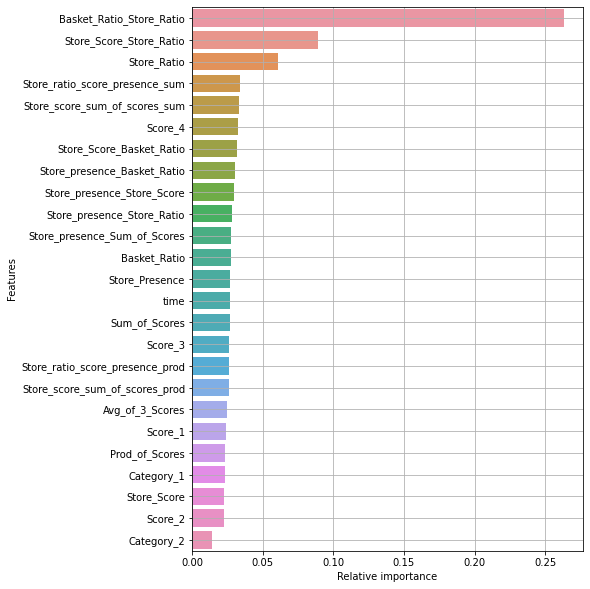

In [ ]:
feat_df = pd.DataFrame({'Features': X_train.columns, 'Relative importance': xgb.feature_importances_})
imp_feat_df = feat_df.sort_values('Relative importance', ascending = False)
plt.figure(figsize = (7, 10))
sns.barplot(x = 'Relative importance', y = 'Features', data = imp_feat_df)
plt.grid()
plt.show()

### Baseline Random Forest Classifier

In [ ]:
# high_level tuned xgboost classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

rf = RandomForestClassifier(random_state = 21)
rf.fit(X_train, y_train)

y_pred_test = rf.predict_proba(X_test)
y_pred_train = rf.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = rf.classes_)
test_loss = log_loss(y_test, y_pred_test, labels = rf.classes_)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Train Loss: 0.1027595495647868
Test Loss: 0.734523417556088


### Baseline Logistic Regression

In [ ]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 21) # default penalty is L2 
lr.fit(X_train, y_train)
y_pred_test = lr.predict_proba(X_test)
y_pred_train = lr.predict_proba(X_train)

train_loss = log_loss(y_train, y_pred_train, labels = lr.classes_, eps = 1e-15)
test_loss = log_loss(y_test, y_pred_test, labels = lr.classes_, eps = 1e-15)
print(train_loss)
print(test_loss)

0.6001569957525709
0.6203538310182389
